In [0]:
import numpy as np
import matplotlib.pyplot as plt
import keras

# 1. Load and perform EDA

In [0]:
mnist = keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [69]:
x_train.shape

(60000, 28, 28)

In [70]:
y_train.shape

(60000,)

In [71]:
x_test.shape

(10000, 28, 28)

In [72]:
y_test.shape

(10000,)

## a. Plot some images:

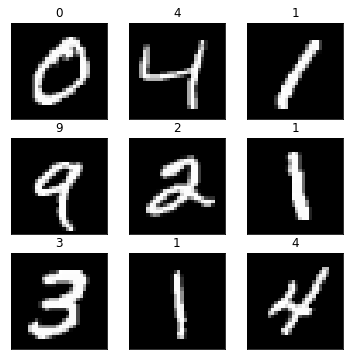

In [73]:
plt.figure(figsize=(6,6))

for i in range(1, 10):
  ax = plt.subplot(3, 3, i)
  ax = plt.imshow(x_train[i], cmap='gray')
  plt.title(y_train[i])
  plt.xticks([])
  plt.yticks([])

## b.  Number of each training example with respect to each label of train and test set

In [0]:
train_label_dict = dict()
test_label_dict = dict()

for i in range(0 ,10):
  n_samples_train = sum(y_train == i)
  n_samples_test = sum(y_test == i)
  train_label_dict[i] = n_samples_train
  test_label_dict[i] = n_samples_test

In [75]:
train_label_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [76]:
test_label_dict

{0: 980,
 1: 1135,
 2: 1032,
 3: 1010,
 4: 982,
 5: 892,
 6: 958,
 7: 1028,
 8: 974,
 9: 1009}

Text(0.5, 1.0, 'Distribution of classes on train set')

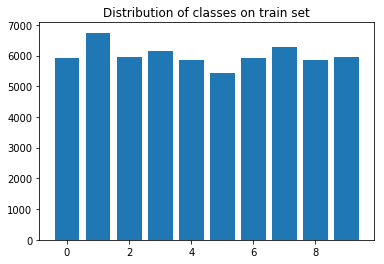

In [77]:
plt.bar(train_label_dict.keys(), train_label_dict.values())
plt.title("Distribution of classes on train set")

Text(0.5, 1.0, 'Distribution of classes on test set')

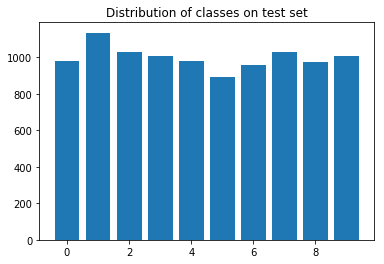

In [78]:
plt.bar(test_label_dict.keys(), test_label_dict.values())
plt.title("Distribution of classes on test set")

# 2. Buid the model

In [0]:
# scale data from 0 -> 255 to 0 -> 1
scaled_x_train = x_train / 255.0
scaled_x_test = x_test / 255.0

In [80]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.fit(scaled_x_train, y_train, epochs = 10)

Epoch 1/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.8203 - acc: 0.7961
Epoch 2/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.3586 - acc: 0.8999
Epoch 3/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.3075 - acc: 0.9114
Epoch 4/10
60000/60000 [==============================] - 17s 277us/step - loss: 0.2800 - acc: 0.9190
Epoch 5/10
60000/60000 [==============================] - 17s 276us/step - loss: 0.2573 - acc: 0.9252
Epoch 6/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.2374 - acc: 0.9313
Epoch 7/10
60000/60000 [==============================] - 17s 279us/step - loss: 0.2179 - acc: 0.9370
Epoch 8/10
60000/60000 [==============================] - 18s 296us/step - loss: 0.1997 - acc: 0.9422
Epoch 9/10
60000/60000 [==============================] - 17s 283us/step - loss: 0.1835 - acc: 0.9471
Epoch 10/10
60000/60000 [==============================] - 17s 278us/step - loss: 

# 3. Evaluate on test set

In [82]:
loss, accuracy_score = model.evaluate(scaled_x_test, y_test)
print('test accuracy: ', accuracy_score)
print('test loss: ', loss)

10000/10000 [==============================] - 1s 63us/step
test accuracy:  0.9515
test loss:  0.1666306019678712


/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


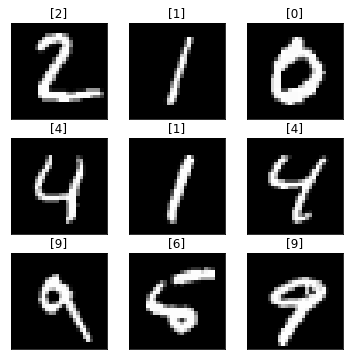

In [83]:
# plot some images with prediction
plt.figure(figsize=(6,6))

for i in range(1, 10):
  ax = plt.subplot(3, 3, i)
  ax = plt.imshow(x_test[i], cmap='gray')
  prediction = np.argmax(model.predict(scaled_x_test[i].reshape(1, 28, 28)), axis=1)
  plt.title(prediction)
  plt.xticks([])
  plt.yticks([])